## Lab 4 

## import libs and connect database

In [56]:
!pip install psycopg2

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [57]:
import pandas
import configparser
import psycopg2

In [42]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [43]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                        )

In [44]:
cur = conn.cursor()

## q1 display all records on student table

In [6]:
sql_q1 = """
        select * from gp9.student
        """

In [7]:
df = pandas.read_sql_query(sql_q1,conn)

df[:]

,s_email,s_name,major
0,s1@dukes.jmu.edu\n,s1,IA\n
1,s2@dukes.jmu.edu\n,s2,GS\n
2,s4@dukes.jmu.edu\n,s4,INTA
3,s3@dukes.jmu.edu,s3,IA


## q2 Display the teachers' names and the corresponding course names jointly basedon the teacher's email.

In [8]:
sql_q2 = """
        select gp9.professor.p_name,
        gp9.course.c_name
        from gp9.professor
        inner join gp9.course
        on gp9.professor.p_email = gp9.course.p_email
        """

In [9]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Xuebin Wei\n,Data Mining\n
1,Anthony Teate,Python
2,Kathleen A Moore,Technology in a Networked World\n
3,new_p,new_c_name
4,new_p,Intro to National Security


## q3 number of students in each class

In [10]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp9.enroll_list
        group by c_number
        order by enrolled desc
        """

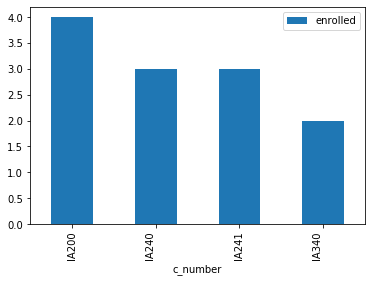

In [11]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## q4 Use a bar chart to show the number of courses taught by each professor's name.

In [12]:
sql_q4 = """
        select gp9.professor.p_name,
        count(gp9.course.c_name) as teaching_number
        from gp9.professor
        inner join gp9.course
        on gp9.professor.p_email = gp9.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

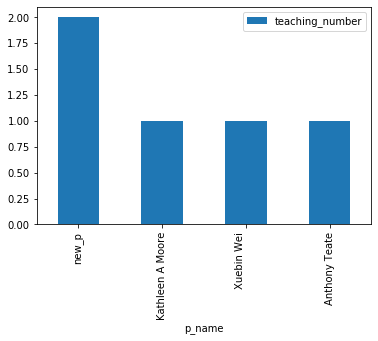

In [13]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## q5 Add a new record of the new professor in the teacher table, and the corresponding new course record in the course table.

In [14]:
sql_q5_professor = """
                   insert into gp9.professor(p_email,p_name,office)
                   values('{}','{}','{}')
                    """.format('newp2@jmu.edu','new2','newoffice2')

In [27]:
cur.execute(sql_q5_professor)

IntegrityError: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(newp2@jmu.edu) already exists.


In [34]:
cur.execute('ROLLBACK')

In [22]:
conn.commit()

In [23]:
df = pandas.read_sql_query("""select * from gp9.professor""",conn)

df[:]

,p_email,p_name,office
0,weixx@jmu.edu\n,Xuebin Wei\n,HHS 112\n
1,moore8ka@jmu.edu,Kathleen A Moore,ISAT 116
2,teateaa@jmu.edu,Anthony Teate,ISAT 126
3,new_p@jmu.edu,new_p,new_office
4,newp2@jmu.edu,new2,newoffice2


In [36]:
sql_q5_course = """
                insert into gp9.course(c_number,c_name,room,p_email)
                values('{}','{}','{}','{}')
                """.format('ianew','new_cname','online', 'newp2@jmu.edu')

In [37]:
cur.execute(sql_q5_course)

In [38]:
df = pandas.read_sql_query("""select * from gp9.course""",conn)

df[:]

,c_number,c_name,room,p_email
0,IA340\n,Data Mining\n,online\n,weixx@jmu.edu\n
1,IA241,Python,online,teateaa@jmu.edu
2,IA240\n,Technology in a Networked World\n,ENGEO1222,moore8ka@jmu.edu
3,ia_new,new_c_name,online,new_p@jmu.edu
4,IA200,Intro to National Security,ISAT150,new_p@jmu.edu
5,ianew,new_cname,online,newp2@jmu.edu


# q6

In [45]:
sql_q6_course = """
                    update gp9.course
                    set p_email = '{}'
                    where p_email = '{}'
                    """.format('new_p@jmu.edu','newp2@jmu.edu')

In [46]:
cur.execute(sql_q6_course)

In [47]:
conn.commit()

In [48]:
df = pandas.read_sql_query("""select * from gp9.course""",conn)

df[:]

,c_number,c_name,room,p_email
0,IA340\n,Data Mining\n,online\n,weixx@jmu.edu\n
1,IA241,Python,online,teateaa@jmu.edu
2,IA240\n,Technology in a Networked World\n,ENGEO1222,moore8ka@jmu.edu
3,ia_new,new_c_name,online,new_p@jmu.edu
4,IA200,Intro to National Security,ISAT150,new_p@jmu.edu
5,ianew,new_cname,online,new_p@jmu.edu


In [62]:
sql_q6_professor = """
                    delete from gp9.professor
                    where p_email = '{}'
                    """.format('newp2@jmu.edu')

In [63]:
cur.execute(sql_q6_professor)

In [64]:
cur.commit()

AttributeError: 'psycopg2.extensions.cursor' object has no attribute 'commit'

In [66]:
df = pandas.read_sql_query("""select * from gp9.professor""",conn)

df[:]

,p_email,p_name,office
0,weixx@jmu.edu\n,Xuebin Wei\n,HHS 112\n
1,moore8ka@jmu.edu,Kathleen A Moore,ISAT 116
2,teateaa@jmu.edu,Anthony Teate,ISAT 126
3,new_p@jmu.edu,new_p,new_office


## close connection

In [67]:
cur.close()

In [68]:
connection.close()

NameError: name 'connection' is not defined